1 - Importando biblioteca e os dados

In [514]:
# ===============================
# Básico
# ===============================
import pandas as pd
import numpy as np

# ===============================
# Visualização
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Streamlit
# ===============================
import streamlit as st

# ===============================
# Scikit-learn – Pré-processamento e Pipeline
# ===============================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    OneHotEncoder,
    FunctionTransformer
)
from sklearn.compose import ColumnTransformer

# ===============================
# Scikit-learn – Modelagem
# ===============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# ===============================
# Scikit-learn – Avaliação e Split
# ===============================
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# ===============================
# Salvar o modelo
# ===============================
import joblib

from preprocessing import preprocess_data
from sklearn.preprocessing import FunctionTransformer

In [515]:
## Carregando base Obesity

df = pd.read_csv('Obesity.csv')

df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


1.1 Analise Exploratória e ETL

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [517]:
df.shape

(2111, 17)

In [518]:
# dados unicos

df.nunique()

Gender               2
Age               1402
Height            1574
Weight            1525
family_history       2
FAVC                 2
FCVC               810
NCP                635
CAEC                 4
SMOKE                2
CH2O              1268
SCC                  2
FAF               1190
TUE               1129
CALC                 4
MTRANS               5
Obesity              7
dtype: int64

In [519]:
df['family_history'].unique()

array(['yes', 'no'], dtype=object)

In [520]:
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [521]:
df['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [522]:
df['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [523]:
df['family_history'] = df['family_history'].replace(['yes', 'no'],[1,0])
df['FAVC'] = df['FAVC'].replace(['yes', 'no'],[1,0])
df['SMOKE'] = df['SMOKE'].replace(['yes', 'no'],[1,0])
df['SCC'] = df['SCC'].replace(['yes', 'no'],[1,0])

C:\Users\rodri\AppData\Local\Temp\ipykernel_4792\1399082168.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_history'] = df['family_history'].replace(['yes', 'no'],[1,0])
C:\Users\rodri\AppData\Local\Temp\ipykernel_4792\1399082168.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAVC'] = df['FAVC'].replace(['yes', 'no'],[1,0])
C:\Users\rodri\AppData\Local\Temp\ipykernel_4792\1399082168.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the ol

In [524]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [525]:
df = df.rename(columns={'FAVC':'Frequent consumption of high-caloric food','FCVC':'Frequency of consumption of vegetables',
                      'NCP':'Number of main meals','CAEC':'Consumption of food between meals',
                       'CH2O':'Daily water consumption','SCC':'Calories consumption monitoring',
                      'FAF':'Physical activity frequency','TUE':'Time using electronic devices',
                      'CALC':'Alcohol consumption','MTRANS':'Transportation used'})

df.head()

,Gender,Age,Height,Weight,family_history,Frequent consumption of high-caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,SMOKE,Daily water consumption,Calories consumption monitoring,Physical activity frequency,Time using electronic devices,Alcohol consumption,Transportation used,Obesity
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [526]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history',
       'Frequent consumption of high-caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'SMOKE', 'Daily water consumption',
       'Calories consumption monitoring', 'Physical activity frequency',
       'Time using electronic devices', 'Alcohol consumption',
       'Transportation used', 'Obesity'],
      dtype='object')

In [527]:
df['Consumption of food between meals'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [528]:
df['Alcohol consumption'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [529]:
df['Transportation used'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [530]:
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [531]:
df.nunique()

Gender                                          2
Age                                          1402
Height                                       1574
Weight                                       1525
family_history                                  2
Frequent consumption of high-caloric food       2
Frequency of consumption of vegetables        810
Number of main meals                          635
Consumption of food between meals               4
SMOKE                                           2
Daily water consumption                      1268
Calories consumption monitoring                 2
Physical activity frequency                  1190
Time using electronic devices                1129
Alcohol consumption                             4
Transportation used                             5
Obesity                                         7
dtype: int64

In [532]:
df.shape

(2111, 17)

In [533]:
df = df[['Gender','family_history','Frequent consumption of high-caloric food','SMOKE','Calories consumption monitoring',
                                            'Age','Height','Frequency of consumption of vegetables','Weight','Number of main meals','Daily water consumption',
                                             'Physical activity frequency','Time using electronic devices',
                                            'Consumption of food between meals','Alcohol consumption','Transportation used','Obesity']]

In [534]:
df.shape

(2111, 17)

In [535]:
df.head()

,Gender,family_history,Frequent consumption of high-caloric food,SMOKE,Calories consumption monitoring,Age,Height,Frequency of consumption of vegetables,Weight,Number of main meals,Daily water consumption,Physical activity frequency,Time using electronic devices,Consumption of food between meals,Alcohol consumption,Transportation used,Obesity
0,Female,1,0,0,0,21.0,1.62,2.0,64.0,3.0,2.0,0.0,1.0,Sometimes,no,Public_Transportation,Normal_Weight
1,Female,1,0,1,1,21.0,1.52,3.0,56.0,3.0,3.0,3.0,0.0,Sometimes,Sometimes,Public_Transportation,Normal_Weight
2,Male,1,0,0,0,23.0,1.80,2.0,77.0,3.0,2.0,2.0,1.0,Sometimes,Frequently,Public_Transportation,Normal_Weight
3,Male,0,0,0,0,27.0,1.80,3.0,87.0,3.0,2.0,2.0,0.0,Sometimes,Frequently,Walking,Overweight_Level_I
4,Male,0,0,0,0,22.0,1.78,2.0,89.8,1.0,2.0,0.0,0.0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II


In [536]:
df['Gender'].value_counts(normalize=True)*100

Gender
Male      50.592136
Female    49.407864
Name: proportion, dtype: float64

In [537]:
df['family_history'].value_counts(normalize=True)*100

family_history
1    81.762198
0    18.237802
Name: proportion, dtype: float64

In [538]:
df['Frequent consumption of high-caloric food'].value_counts(normalize=True)*100

Frequent consumption of high-caloric food
1    88.394126
0    11.605874
Name: proportion, dtype: float64

In [539]:
df['SMOKE'].value_counts(normalize=True)*100

SMOKE
0    97.91568
1     2.08432
Name: proportion, dtype: float64

In [540]:
df['Calories consumption monitoring'].value_counts(normalize=True)*100

Calories consumption monitoring
0    95.452392
1     4.547608
Name: proportion, dtype: float64

In [541]:
df['Consumption of food between meals'].value_counts(normalize=True)*100

Consumption of food between meals
Sometimes     83.609664
Frequently    11.463761
Always         2.510658
no             2.415917
Name: proportion, dtype: float64

In [542]:
df['Alcohol consumption'].value_counts(normalize=True)*100

Alcohol consumption
Sometimes     66.366651
no            30.270014
Frequently     3.315964
Always         0.047371
Name: proportion, dtype: float64

In [543]:
df['Transportation used'].value_counts(normalize=True)*100

Transportation used
Public_Transportation    74.846045
Automobile               21.648508
Walking                   2.652771
Motorbike                 0.521080
Bike                      0.331596
Name: proportion, dtype: float64

In [544]:
df['Obesity'].value_counts(normalize=True)*100

Obesity
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64

<Axes: >

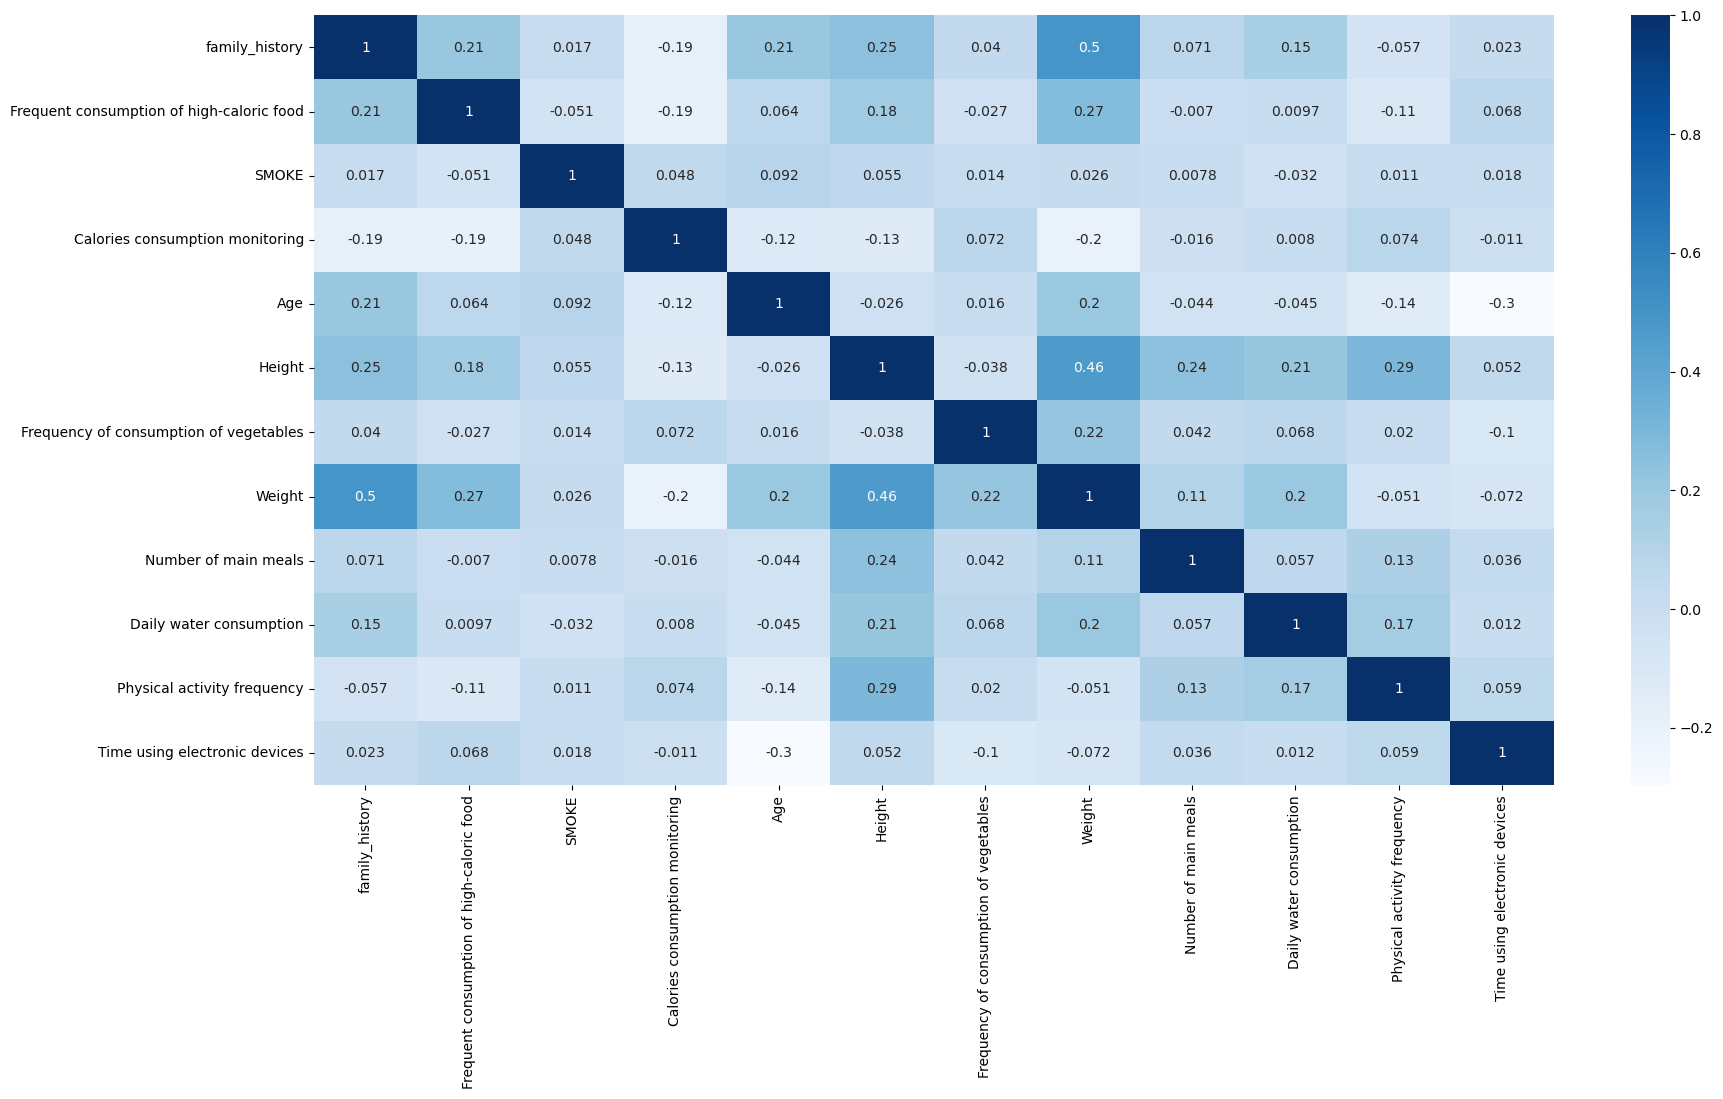

In [545]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr, cmap='Blues',annot=True)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   family_history                             2111 non-null   int64  
 2   Frequent consumption of high-caloric food  2111 non-null   int64  
 3   SMOKE                                      2111 non-null   int64  
 4   Calories consumption monitoring            2111 non-null   int64  
 5   Age                                        2111 non-null   float64
 6   Height                                     2111 non-null   float64
 7   Frequency of consumption of vegetables     2111 non-null   float64
 8   Weight                                     2111 non-null   float64
 9   Number of main meals                       2111 non-null   float64
 10  Daily water consumption 

# Pipeline

# Modelo

In [547]:
# ===============================
# FUNÇÃO DE PRÉ-PROCESSAMENTO
# ===============================
def preprocess_data(df):
    df = df.copy()

    # Gender
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

    # Ordinais
    ordinal_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
    df['Consumption of food between meals'] = df['Consumption of food between meals'].map(ordinal_map)
    df['Alcohol consumption'] = df['Alcohol consumption'].map(ordinal_map)

    # Transportation (granular)
    transport_map = {
        'Walking': 1,
        'Bike': 2,
        'Public_Transportation': 3,
        'Motorbike': 4,
        'Automobile': 5
    }
    df['Transportation used'] = df['Transportation used'].map(transport_map)

    return df


# ===============================
# DADOS
# ===============================
X = df.drop('Obesity', axis=1)
y_raw = df['Obesity']

# Target encoder
le_target = LabelEncoder()
y = le_target.fit_transform(y_raw)

# ===============================
# PIPELINE
# ===============================
pipeline = Pipeline(steps=[
    ('preprocess', FunctionTransformer(preprocess_data)),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=8,
        random_state=42
    ))
])

# ===============================
# SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# TREINO
# ===============================
pipeline.fit(X_train, y_train)

# ===============================
# AVALIAÇÃO
# ===============================
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.79      0.91      0.85        58
     Obesity_Type_I       0.92      0.94      0.93        70
    Obesity_Type_II       1.00      0.97      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.87      0.83      0.85        58
Overweight_Level_II       0.93      0.91      0.92        58

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



“O modelo comportamental apresentou acurácia de 81%, desempenho consistente com a 
complexidade do fenômeno estudado. Observou-se maior dificuldade na distinção entre classes limítrofes,
refletindo a sobreposição natural de hábitos alimentares e níveis de atividade física entre indivíduos com perfis semelhantes. 
Em contrapartida, os níveis mais severos de obesidade foram identificados com elevada precisão.”

In [548]:

# Modelo dentro da pipeline
rf_model = pipeline.named_steps['model']

# X após preprocessamento
X_processed = pipeline.named_steps['preprocess'].transform(X)

# Feature importance correta
feat_imp = pd.Series(
    rf_model.feature_importances_,
    index=X_processed.columns
).sort_values(ascending=False)

feat_imp.head(10)


Weight                                    0.373708
Frequency of consumption of vegetables    0.094402
Height                                    0.092811
Age                                       0.088384
Gender                                    0.066238
Number of main meals                      0.042510
Time using electronic devices             0.038069
Consumption of food between meals         0.036085
Daily water consumption                   0.035878
Physical activity frequency               0.035736
dtype: float64

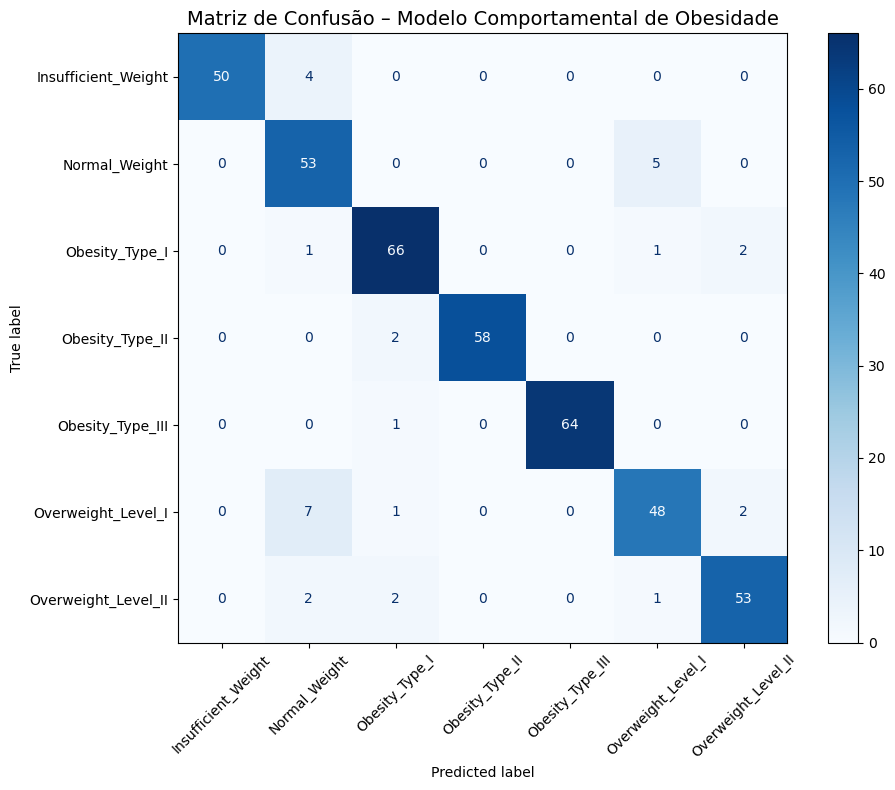

In [549]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))  # 🔥 AQUI está a mágica

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=le_target.classes_
)

disp.plot(
    cmap=plt.cm.Blues,
    ax=ax,
    xticks_rotation=45,
    values_format='d'
)

ax.set_title("Matriz de Confusão – Modelo Comportamental de Obesidade", fontsize=14)
plt.tight_layout()
plt.show()


In [550]:

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

y_dummy = dummy.predict(X_test)

print("Dummy F1:", f1_score(y_test, y_dummy, average='weighted'))


Dummy F1: 0.04699360791027098


“O desvio padrão observado na validação cruzada está associado ao tamanho limitado da amostra e 
à natureza multiclasses do problema, refletindo variações naturais na composição dos folds.”

In [551]:
joblib.dump(pipeline, 'modelo_obesidade_pipeline.pkl')
joblib.dump(le_target, 'label_encoder.pkl')

['label_encoder.pkl']